In [74]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# read the processed file 

df = pd.read_csv('../data/processed/merged_data.csv')
print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Years: {df['year'].min()} to {df['year'].max()}")
print(f"Unique drivers: {df['driverId'].nunique()}")
print(f"Unique races: {df['raceId'].nunique()}")

Data loaded: 26759 rows, 36 columns
Years: 1950 to 2024
Unique drivers: 861
Unique races: 1125


/tmp/ipykernel_4126/3245954587.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/merged_data.csv')


In [76]:
display(df.head(5))

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,finish_position,points,...,surname,nationality_race,constructorRef,constructor_name,nationality_constructor,grid_position,circuitRef,name,location,country
0,1,18,1,1,22,1,1,1,1,10.0,...,Hamilton,British,mclaren,McLaren,British,1.0,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
1,2,18,2,2,3,5,2,2,2,8.0,...,Heidfeld,German,bmw_sauber,BMW Sauber,German,5.0,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
2,3,18,3,3,7,7,3,3,3,6.0,...,Rosberg,German,williams,Williams,British,7.0,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
3,4,18,4,4,5,11,4,4,4,5.0,...,Alonso,Spanish,renault,Renault,French,12.0,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
4,5,18,5,1,23,3,5,5,5,4.0,...,Kovalainen,Finnish,mclaren,McLaren,British,3.0,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia


In [77]:
# deterct mising grid positions
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:")
print(missing)
print(f"Total missing: {df.isnull().sum().sum()} ({(df.isnull().sum().sum() / df.size * 100):.2f}%)")


Missing values:
grid_position    16265
dtype: int64
Total missing: 16265 (1.69%)


In [78]:
# Handle Missing Grid Positions

print(f"Rows before filtering: {len(df)}")
df = df[df['grid_position'].notna()]
print(f"Rows after filtering: {len(df)}")
print(f"Removed {16265} rows with missing grid position")

print(f"Remaining races: {df['raceId'].nunique()}")
print(f"Remaining years: {df['year'].min()} to {df['year'].max()}")

Rows before filtering: 26759
Rows after filtering: 10494
Removed 16265 rows with missing grid position
Remaining races: 494
Remaining years: 1994 to 2024


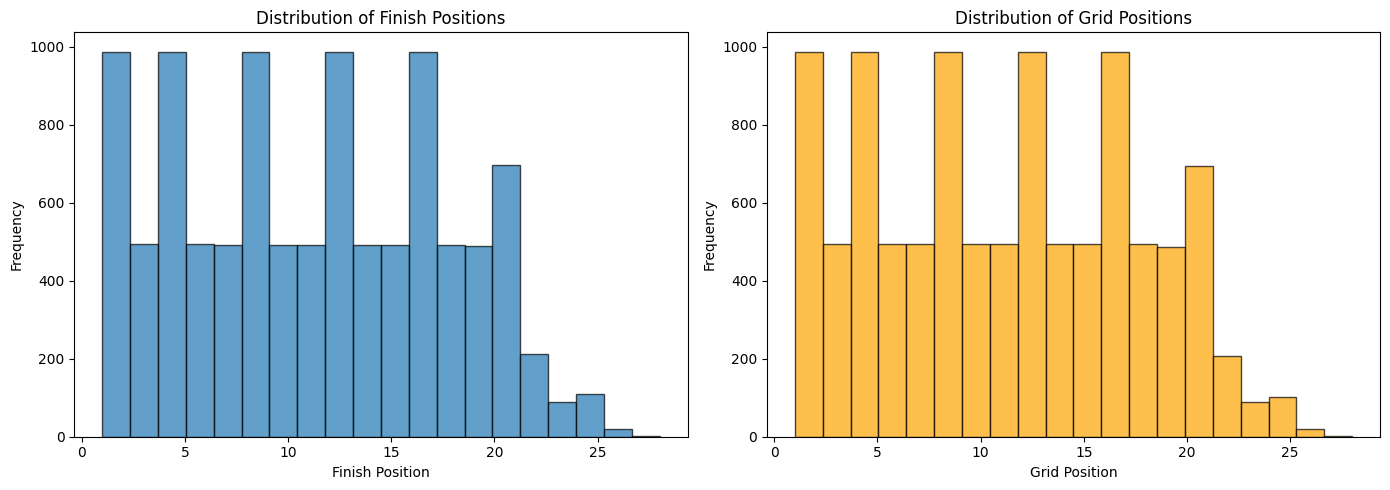

In [79]:
# Target Variable Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['finish_position'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Finish Position')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Finish Positions')

axes[1].hist(df['grid_position'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Grid Position')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Grid Positions')

plt.tight_layout()
plt.show()

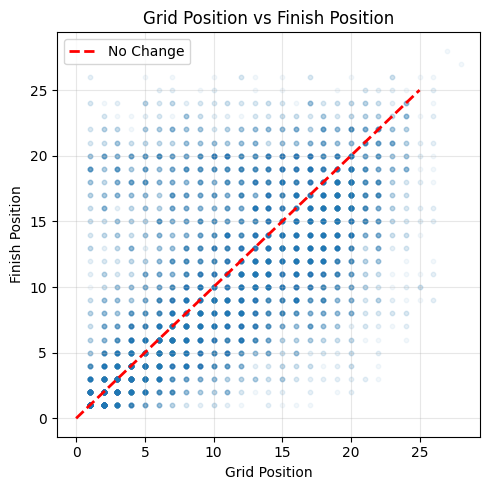

Correlation: 0.5765


In [80]:
# Grid vs Finish Position

plt.figure(figsize=(5, 5))
plt.scatter(df['grid_position'], df['finish_position'], alpha=0.05, s=10)
plt.plot([0, 25], [0, 25], 'r--', linewidth=2, label='No Change')
plt.xlabel('Grid Position')
plt.ylabel('Finish Position')
plt.title('Grid Position vs Finish Position')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

correlation = df['grid_position'].corr(df['finish_position'])
print(f"Correlation: {correlation:.4f}")

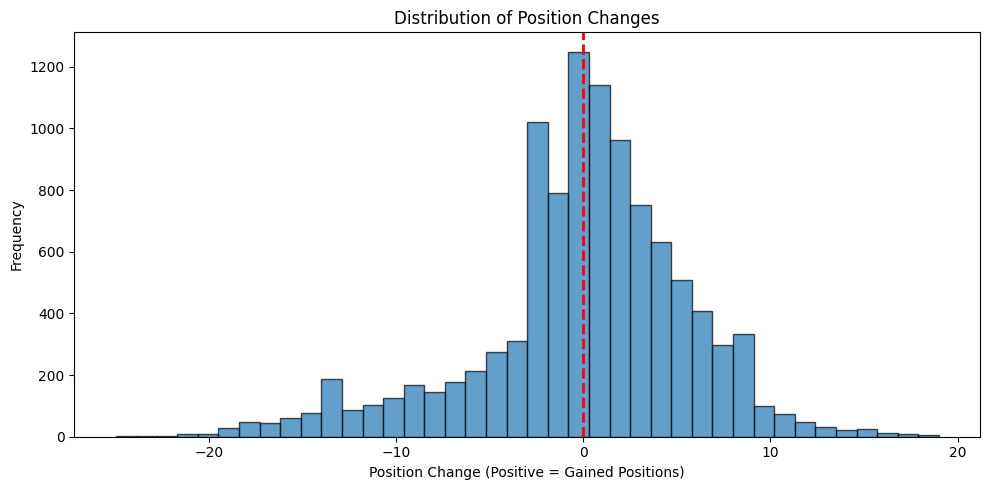

Mean position change: -0.02
Drivers gaining positions: 5360
Drivers losing positions: 3885


In [81]:
# Position Change Analysis

df['position_change'] = df['grid_position'] - df['finish_position']

plt.figure(figsize=(10, 5))
plt.hist(df['position_change'].dropna(), bins=40, edgecolor='black', alpha=0.7)
plt.xlabel('Position Change (Positive = Gained Positions)')
plt.ylabel('Frequency')
plt.title('Distribution of Position Changes')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.tight_layout()
plt.show()

print(f"Mean position change: {df['position_change'].mean():.2f}")
print(f"Drivers gaining positions: {(df['position_change'] > 0).sum()}")
print(f"Drivers losing positions: {(df['position_change'] < 0).sum()}")

In [82]:
# Pole Position Win Rate
pole_positions = df[df['grid_position'] == 1]
pole_wins = pole_positions[pole_positions['finish_position'] == 1]
pole_win_rate = len(pole_wins) / len(pole_positions)

print(f"Total pole positions: {len(pole_positions)}")
print(f"Wins from pole: {len(pole_wins)}")
print(f"Win rate from pole: {pole_win_rate:.2%}")

Total pole positions: 494
Wins from pole: 248
Win rate from pole: 50.20%


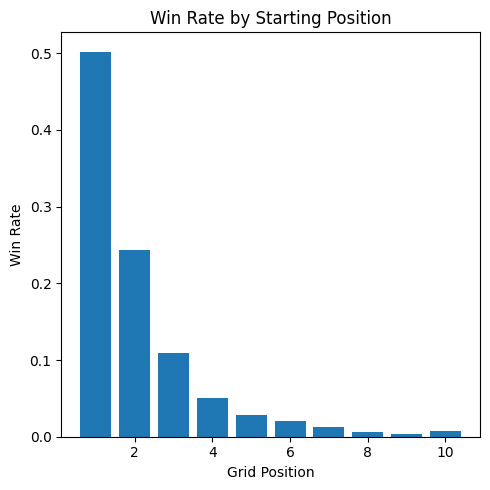

In [83]:
# Win Rate by Grid Position
win_rates = []
for grid_pos in range(1, 11):
    starts = df[df['grid_position'] == grid_pos]
    if len(starts) > 0:
        wins = starts[starts['finish_position'] == 1]
        win_rates.append({'grid': grid_pos, 'rate': len(wins) / len(starts)})

win_rate_df = pd.DataFrame(win_rates)

plt.figure(figsize=(5, 5))
plt.bar(win_rate_df['grid'], win_rate_df['rate'])
plt.xlabel('Grid Position')
plt.ylabel('Win Rate')
plt.title('Win Rate by Starting Position')
plt.tight_layout()
plt.show()

In [89]:
# Top Winners
winners = df[df['finish_position'] == 1]
top_constructors = winners.groupby('constructor_name').size().sort_values(ascending=False).head(10)

In [ ]:
# Correlation Matrix
numeric_cols = ['grid_position', 'finish_position', 'position_change', 'year', 'round']
correlation_matrix = df[numeric_cols].corr()

print("\nCorrelation with finish_position:")
print(correlation_matrix['finish_position'].sort_values())


Correlation with finish_position:
position_change   -0.461941
year              -0.081745
round             -0.015768
grid_position      0.576455
finish_position    1.000000
Name: finish_position, dtype: float64


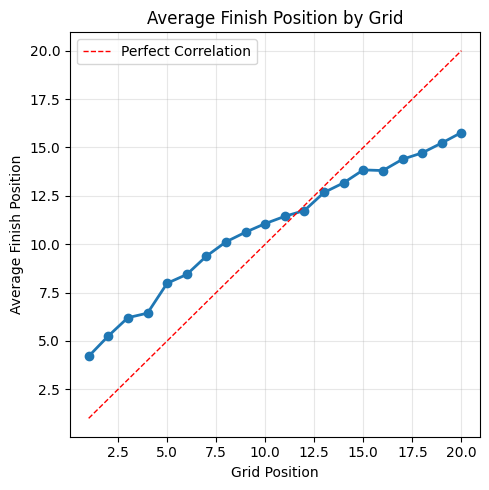

In [86]:
# Average Finish by Grid Position
avg_finish = df.groupby('grid_position')['finish_position'].mean().reset_index()
avg_finish = avg_finish[avg_finish['grid_position'] <= 20]

plt.figure(figsize=(5, 5))
plt.plot(avg_finish['grid_position'], avg_finish['finish_position'], marker='o', linewidth=2)
plt.plot([1, 20], [1, 20], 'r--', linewidth=1, label='Perfect Correlation')
plt.xlabel('Grid Position')
plt.ylabel('Average Finish Position')
plt.title('Average Finish Position by Grid')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [90]:
# Summary

print("EDA SUMMARY")
print(f"Total records: {len(df):,}")
print(f"Years: {df['year'].min()} to {df['year'].max()}")
print(f"Unique drivers: {df['driverId'].nunique()}")
print(f"Unique races: {df['raceId'].nunique()}")
print(f"\nKey Findings:")
print(f"Grid-finish correlation: {correlation:.4f}")
print(f"Pole win rate: {pole_win_rate:.2%}")
print(f"Top constructor: {top_constructors.index[0]} ({top_constructors.iloc[0]} wins)")

EDA SUMMARY
Total records: 10,494
Years: 1994 to 2024
Unique drivers: 172
Unique races: 494

Key Findings:
Grid-finish correlation: 0.5765
Pole win rate: 50.20%
Top constructor: Red Bull (122 wins)
